In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Preliminary analysis

In [2]:
benchmark_2w1i = 'benchmark_200w_1000i.txt'
benchmark_2w5i = 'benchmark_200w_5000i.txt'
benchmark_4w1i = 'benchmark_400w_1000i.txt'
benchmark_4w5i = 'benchmark_400w_5000i.txt'

df_2w1i = pd.read_csv(benchmark_2w1i, delim_whitespace=True, skiprows=4,usecols=[0,1,2,3,4],names=["Size", "Avg_Latency_us", "Min_Latency_us","Max_Latency_us","Iterations"])
df_2w5i = pd.read_csv(benchmark_2w5i, delim_whitespace=True, skiprows=4,usecols=[0,1,2,3,4],names=["Size", "Avg_Latency_us", "Min_Latency_us","Max_Latency_us","Iterations"])
df_4w1i = pd.read_csv(benchmark_4w1i, delim_whitespace=True, skiprows=4,usecols=[0,1,2,3,4],names=["Size", "Avg_Latency_us", "Min_Latency_us","Max_Latency_us","Iterations"])
df_4w5i = pd.read_csv(benchmark_4w5i, delim_whitespace=True, skiprows=4,usecols=[0,1,2,3,4],names=["Size", "Avg_Latency_us", "Min_Latency_us","Max_Latency_us","Iterations"])

### Mean and Standard Deviation of increase in average latency

In [3]:
df_2w1i['Avg_Latency_Increase'] = df_2w1i['Avg_Latency_us'].diff()/np.log2(df_2w1i["Size"])
df_2w1i_lat_increase = df_2w1i['Avg_Latency_Increase'].dropna()

df_2w1i_mean_increase = df_2w1i_lat_increase.mean()
df_2w1i_std_increase = df_2w1i_lat_increase.std()
# ---
df_2w5i['Avg_Latency_Increase'] = df_2w5i['Avg_Latency_us'].diff()/np.log2(df_2w5i["Size"])
df_2w5i_lat_increase = df_2w5i['Avg_Latency_Increase'].dropna()

df_2w5i_mean_increase = df_2w5i_lat_increase.mean()
df_2w5i_std_increase = df_2w5i_lat_increase.std()
# ---
df_4w1i['Avg_Latency_Increase'] = df_4w1i['Avg_Latency_us'].diff()/np.log2(df_4w1i["Size"])
df_4w1i_lat_increase = df_4w1i['Avg_Latency_Increase'].dropna()

df_4w1i_mean_increase = df_4w1i_lat_increase.mean()
df_4w1i_std_increase = df_4w1i_lat_increase.std()
# ---
df_4w5i['Avg_Latency_Increase'] = df_4w5i['Avg_Latency_us'].diff()/np.log2(df_4w5i["Size"])
df_4w5i_lat_increase = df_4w5i['Avg_Latency_Increase'].dropna()

df_4w5i_mean_increase = df_4w5i_lat_increase.mean()
df_4w5i_std_increase = df_4w5i_lat_increase.std()
# ---

# Summary table

latency_mean_increases = [df_2w1i_mean_increase,df_2w5i_mean_increase,df_4w1i_mean_increase,df_4w5i_mean_increase]
latency_std_increase = [df_2w1i_std_increase,df_2w5i_std_increase,df_4w1i_std_increase,df_4w5i_std_increase]

summary_table1 = pd.DataFrame({
    "Mean Latency Increase": latency_mean_increases,
    "Std Latency Increase": latency_std_increase
})

summary_table1.index = ["200 warm-up; 1000 iters","200 warm-up; 5000 iters","400 warm-up; 1000 iters","400 warm-up; 5000 iters"]

In [4]:
print(summary_table1)

                         Mean Latency Increase  Std Latency Increase
200 warm-up; 1000 iters              12.606239             29.737029
200 warm-up; 5000 iters              13.025586             31.314975
400 warm-up; 1000 iters              12.245689             29.428649
400 warm-up; 5000 iters              13.189232             31.900975


### Latency against Message Size

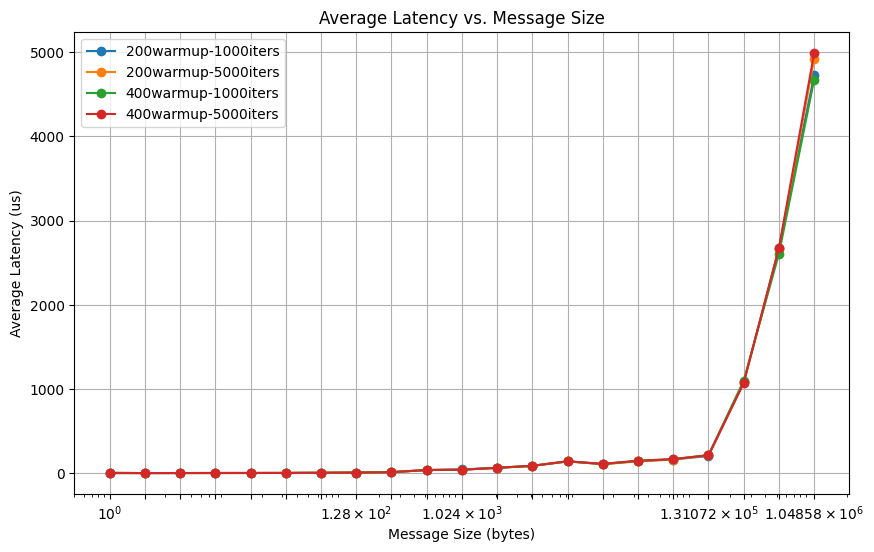

In [5]:
plt.figure(figsize=(10,6))

plt.plot(df_2w1i['Size'], df_2w1i['Avg_Latency_us'], label='200warmup-1000iters', marker='o')
plt.plot(df_2w5i['Size'], df_2w5i['Avg_Latency_us'], label='200warmup-5000iters', marker='o')
plt.plot(df_4w1i['Size'], df_4w1i['Avg_Latency_us'], label='400warmup-1000iters', marker='o')
plt.plot(df_4w5i['Size'], df_4w5i['Avg_Latency_us'], label='400warmup-5000iters', marker='o')

plt.title('Average Latency vs. Message Size')
plt.xlabel('Message Size (bytes)')
plt.ylabel('Average Latency (us)')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.xticks(df_2w1i['Size'])

plt.show()

### Correlation between Latency and Message Size

In [5]:
log_mex_size_1 = np.log2(df_2w1i['Size'])
log_mex_size_2 = np.log2(df_2w5i['Size'])
log_mex_size_3 = np.log2(df_4w1i['Size'])
log_mex_size_4 = np.log2(df_4w5i['Size'])

# 200 warmup - 1000 iters
corr_avg_lat_1 = log_mex_size_1.corr(df_2w1i["Avg_Latency_us"])
corr_min_lat_1 = log_mex_size_1.corr(df_2w1i["Min_Latency_us"])
corr_max_lat_1 = log_mex_size_1.corr(df_2w1i["Max_Latency_us"])

# 200 warmup - 5000 iters
corr_avg_lat_2 = log_mex_size_2.corr(df_2w5i["Avg_Latency_us"])
corr_min_lat_2 = log_mex_size_2.corr(df_2w5i["Min_Latency_us"])
corr_max_lat_2 = log_mex_size_2.corr(df_2w5i["Max_Latency_us"])

# 400 warmup - 1000 iters
corr_avg_lat_3 = log_mex_size_3.corr(df_4w1i["Avg_Latency_us"])
corr_min_lat_3 = log_mex_size_3.corr(df_4w1i["Min_Latency_us"])
corr_max_lat_3 = log_mex_size_3.corr(df_4w1i["Max_Latency_us"])

# 400 warmup - 5000 iters
corr_avg_lat_4 = log_mex_size_4.corr(df_4w5i["Avg_Latency_us"])
corr_min_lat_4 = log_mex_size_4.corr(df_4w5i["Min_Latency_us"])
corr_max_lat_4 = log_mex_size_4.corr(df_4w5i["Max_Latency_us"])

# Summary table

latency_avg_corr = [corr_avg_lat_1,corr_avg_lat_2,corr_avg_lat_3,corr_avg_lat_4]
latency_min_corr = [corr_min_lat_1,corr_min_lat_2,corr_min_lat_3,corr_min_lat_4]
latency_max_corr = [corr_max_lat_1,corr_max_lat_2,corr_max_lat_3,corr_max_lat_4]

summary_table2 = pd.DataFrame({
    "Average Latency Correlation": latency_avg_corr,
    "Minimum Latency Correlation": latency_min_corr,
    "Maximum Latency Correlation": latency_max_corr
})

summary_table2.index = ["200 warm-up; 1000 iters","200 warm-up; 5000 iters","400 warm-up; 1000 iters","400 warm-up; 5000 iters"]


In [7]:
print(summary_table2)

                         Average Latency Correlation  \
200 warm-up; 1000 iters                     0.588192   
200 warm-up; 5000 iters                     0.583308   
400 warm-up; 1000 iters                     0.589988   
400 warm-up; 5000 iters                     0.582288   

                         Minimum Latency Correlation  \
200 warm-up; 1000 iters                     0.428382   
200 warm-up; 5000 iters                     0.420321   
400 warm-up; 1000 iters                     0.425036   
400 warm-up; 5000 iters                     0.425392   

                         Maximum Latency Correlation  
200 warm-up; 1000 iters                     0.600006  
200 warm-up; 5000 iters                     0.594632  
400 warm-up; 1000 iters                     0.600168  
400 warm-up; 5000 iters                     0.594085  


### Average Latency Increase Distribution

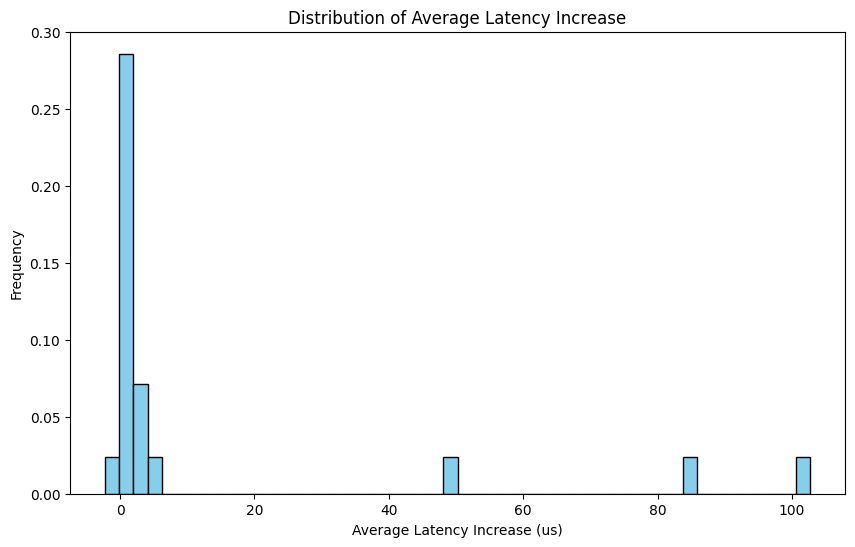

Outliers in Average Latency:
        Size  Avg_Latency_us  Min_Latency_us  Max_Latency_us  Iterations  \
18   262144         1079.02          111.04         1481.14        1000   
19   524288         2672.94          292.85         3550.45        1000   
20  1048576         4726.08         2572.33         6189.75        1000   

    Avg_Latency_Increase  
18             48.508333  
19             83.890526  
20            102.657000  


In [8]:
# HISTOGRAM

plt.figure(figsize=(10, 6))
plt.hist(df_2w1i["Avg_Latency_Increase"], bins=50, color="skyblue", edgecolor="black", density=True)
plt.xlabel("Average Latency Increase (us)")
plt.ylabel("Frequency")
plt.title("Distribution of Average Latency Increase")

#plt.yscale('log')
plt.show()

# OUTLIERS DETECTION

Q1 = df_2w1i["Avg_Latency_Increase"].quantile(0.25)
Q3 = df_2w1i["Avg_Latency_Increase"].quantile(0.75)
IQR = Q3 - Q1

# Outliers are points that fall outside 1.5*IQR from Q1 or Q3
outliers = df_2w1i[(df_2w1i["Avg_Latency_Increase"] < (Q1 - 1.5 * IQR)) | (df_2w1i["Avg_Latency_Increase"] > (Q3 + 1.5 * IQR))]
print("Outliers in Average Latency:\n", outliers)

## Comparison of latency behaviour between different algorithms

The minimum increase in mean latency and its standard deviation between runs that we performed on the epic node of ORFEO cluster is given by $400$ warm-up iterations and $1000$ iterations.  
So, these are the values for which we computed runs over the same node with $2$ other algorithms.

In [6]:
benchmark_1_EPYC = 'benchmark_1_EPYC.txt'
benchmark_2_EPYC = 'benchmark_2_EPYC.txt'

df_1_epyc = pd.read_csv(benchmark_1_EPYC, delim_whitespace=True, skiprows=4,usecols=[0,1,2,3,4],names=["Size", "Avg_Latency_us", "Min_Latency_us","Max_Latency_us","Iterations"])
df_2_epyc = pd.read_csv(benchmark_2_EPYC, delim_whitespace=True, skiprows=4,usecols=[0,1,2,3,4],names=["Size", "Avg_Latency_us", "Min_Latency_us","Max_Latency_us","Iterations"])

### Mean and standard deviation of increase in average latency

In [7]:
df_1_epyc['Avg_Latency_Increase'] = df_1_epyc['Avg_Latency_us'].diff()/np.log2(df_1_epyc["Size"])
df_1_epyc_lat_increase = df_1_epyc['Avg_Latency_Increase'].dropna()

df_1_epyc_mean_increase = df_1_epyc_lat_increase.mean()
df_1_epyc_std_increase = df_1_epyc_lat_increase.std()
# ---
df_2_epyc['Avg_Latency_Increase'] = df_2_epyc['Avg_Latency_us'].diff()/np.log2(df_2_epyc["Size"])
df_2_epyc_lat_increase = df_2_epyc['Avg_Latency_Increase'].dropna()

df_2_epyc_mean_increase = df_2_epyc_lat_increase.mean()
df_2_epyc_std_increase = df_2_epyc_lat_increase.std()
# ---

# Summary table

latency_mean_increases = [df_4w1i_mean_increase,df_1_epyc_mean_increase,df_2_epyc_mean_increase]
latency_std_increase = [df_4w1i_std_increase,df_1_epyc_std_increase,df_2_epyc_std_increase]

summary_table3 = pd.DataFrame({
    "Mean Latency Increase": latency_mean_increases,
    "Std Latency Increase": latency_std_increase
})

summary_table3.index = ["Baseline algorithm","Linear algorithm","Linear NB algorithm"]

print(summary_table3)

                     Mean Latency Increase  Std Latency Increase
Baseline algorithm               12.245689             29.428649
Linear algorithm                 29.254501             60.968161
Linear NB algorithm               9.578918             21.923897


### Latency against Message Size

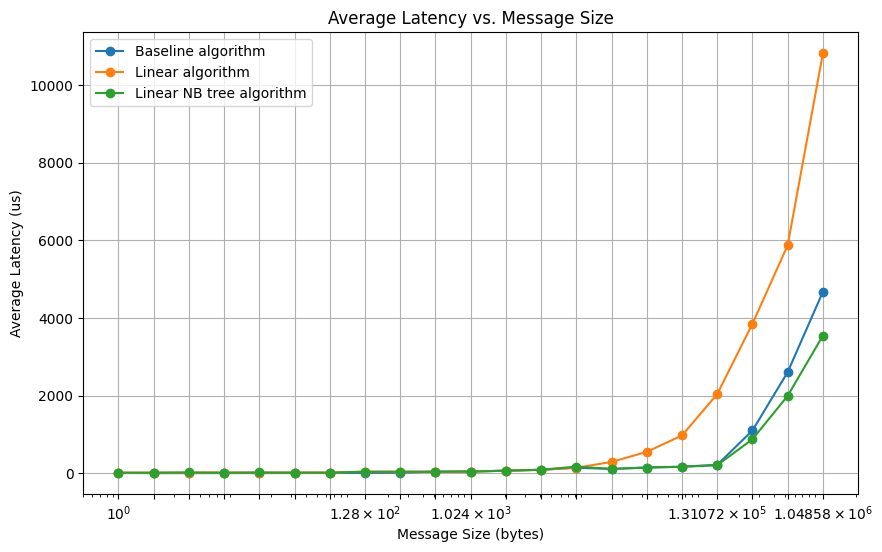

In [8]:
plt.figure(figsize=(10,6))

plt.plot(df_4w1i['Size'], df_4w1i['Avg_Latency_us'], label='Baseline algorithm', marker='o')
plt.plot(df_1_epyc['Size'], df_1_epyc['Avg_Latency_us'], label='Linear algorithm', marker='o')
plt.plot(df_2_epyc['Size'], df_2_epyc['Avg_Latency_us'], label='Linear NB tree algorithm', marker='o')

plt.title('Average Latency vs. Message Size')
plt.xlabel('Message Size (bytes)')
plt.ylabel('Average Latency (us)')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.xticks(df_4w1i['Size'])

plt.show()

### Correlation between latency and message size

In [ ]:
log_mex_size_1_epyc = np.log2(df_1_epyc['Size'])
log_mex_size_2_epyc = np.log2(df_2_epyc['Size'])

# Linear algorithm
corr_avg_lat_1_epyc = log_mex_size_1_epyc.corr(df_1_epyc["Avg_Latency_us"])
corr_min_lat_1_epyc = log_mex_size_1_epyc.corr(df_1_epyc["Min_Latency_us"])
corr_max_lat_1_epyc = log_mex_size_1_epyc.corr(df_1_epyc["Max_Latency_us"])

# Linear NB algorithm
corr_avg_lat_2_epyc = log_mex_size_2_epyc.corr(df_2_epyc["Avg_Latency_us"])
corr_min_lat_2_epyc = log_mex_size_2_epyc.corr(df_2_epyc["Min_Latency_us"])
corr_max_lat_2_epyc = log_mex_size_2_epyc.corr(df_2_epyc["Max_Latency_us"])

# Summary table

latency_avg_corr = [corr_avg_lat_3,corr_avg_lat_1_epyc,corr_avg_lat_2_epyc]
latency_min_corr = [corr_min_lat_3,corr_min_lat_1_epyc,corr_min_lat_2_epyc]
latency_max_corr = [corr_max_lat_3,corr_max_lat_1_epyc,corr_max_lat_2_epyc]

summary_table4 = pd.DataFrame({
    "Average Latency Correlation": latency_avg_corr,
    "Minimum Latency Correlation": latency_min_corr,
    "Maximum Latency Correlation": latency_max_corr
})

summary_table4.index = ["Baseline algorithm","Chain algorithm","Binary tree algorithm"]

print(summary_table4)

                       Average Latency Correlation  \
Baseline algorithm                        0.589988   
Chain algorithm                           0.651425   
Binary tree algorithm                     0.599336   

                       Minimum Latency Correlation  \
Baseline algorithm                        0.425036   
Chain algorithm                           0.587831   
Binary tree algorithm                     0.455189   

                       Maximum Latency Correlation  
Baseline algorithm                        0.600168  
Chain algorithm                           0.657799  
Binary tree algorithm                     0.601742  
